In [33]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_june_temp = []
month_june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
#print(month_june_temp )

In [7]:
#  3. Convert the June temperatures to a list.
june_temps = list(np.ravel(month_june_temp))
#print(june_temps)

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(month_june_temp, columns=['date','June Temps'])
june_temps_df.set_index(june_temps_df['date'], inplace= True)
june_temps_df = june_temps_df.sort_index()
#print(june_temps_df.to_string(index=False))


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


### Additional Query to Create Histogram

Text(0.5, 1.0, 'June Temperatures')

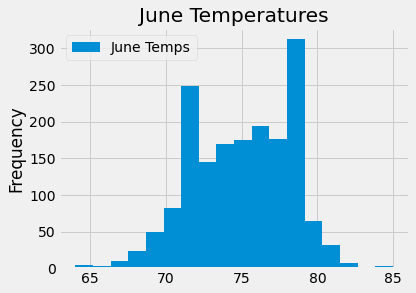

In [56]:
june_temp_df = pd.DataFrame(june_temps_df, columns=['June Temps'])
june_temp_df.plot.hist(bins=18)
plt.tight_layout()
plt.title('June Temperatures')


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month_dec_temp = []
month_dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
#print(month_dec_temp )

In [11]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(month_dec_temp))
#print(dec_temps)

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(month_dec_temp, columns=['date','Dec Temps'])
dec_temps_df.set_index(dec_temps_df['date'], inplace= True)
dec_temps_df = dec_temps_df.sort_index()
#print(dec_temps_df.to_string(index=False))

In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Additional Query to Create Histogram

Text(0.5, 1.0, 'December Temperatures')

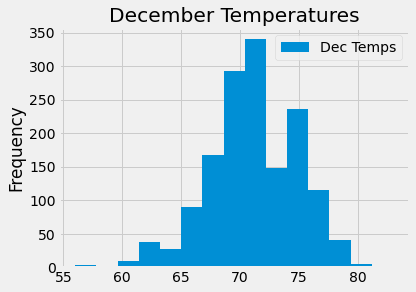

In [61]:
dec_temp_df = pd.DataFrame(dec_temps_df, columns=['Dec Temps'])
dec_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')

# Additional Queries 

### June Precipitation

In [62]:
#Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
month_june_prcp = []
month_june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
#print(month_june_prcp )

In [63]:
#Sort the dataframe by date (without the index)- to see the difference 
june_prcp_df = pd.DataFrame(month_june_prcp, columns=['date','June Precipitation'])
june_prcp_df.set_index(june_prcp_df['date'], inplace= True)
#print(june_prcp_df)
june_prcp_df = june_prcp_df.sort_index()
#print(june_prcp_df.to_string(index=False))

In [64]:
# Calculate and print out the summary statistics for the June precipitation DataFrame.
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


### December Precipitation

In [66]:
#Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 
month_dec_prcp = []
month_dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
#print(month_dec_prcp )

In [69]:
#Sort the dataframe by date (without the index)- to see the difference 
dec_prcp_df = pd.DataFrame(month_dec_prcp, columns=['date','December Precipitation'])
dec_prcp_df.set_index(dec_prcp_df['date'], inplace= True)
#print(dec_prcp_df)
dec_prcp_df = dec_prcp_df.sort_index()
#print(dec_prcp_df.to_string(index=False))

In [70]:
# Calculate and print out the summary statistics for the June precipitation DataFrame.
dec_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
